### Problem Statement

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset

## 1. Import libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## 2.Load data

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## 3.Understanding data

In [6]:
train_set.shape

(32561, 15)

In [7]:
test_set.shape

(16281, 15)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Categorical features description
train_set.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## 4.Feature Engineering

In [12]:
## Checking for missing values
train_set.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

### income:


In [13]:
train_set['wage_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

In [14]:
print('Percetage of data in each class')
print('-----------------------------------')
print('<=50K',train_set["wage_class"].value_counts()[0] / train_set.shape[0])
print('>50K',train_set["wage_class"].value_counts()[1] / train_set.shape[0])

Percetage of data in each class
-----------------------------------
<=50K 0.7591904425539756
>50K 0.2408095574460244


<AxesSubplot:xlabel='wage_class', ylabel='count'>

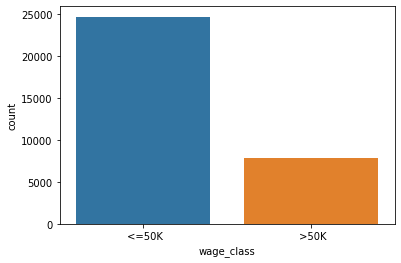

In [15]:
sns.countplot(x=train_set['wage_class'])

### age:


In [16]:
train_set.groupby('wage_class')['age'].mean()

wage_class
 <=50K    36.783738
 >50K     44.249841
Name: age, dtype: float64

C:\Users\hanesha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

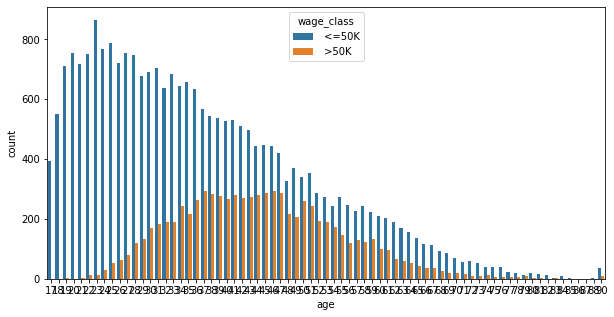

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(train_set['age'],hue=train_set['wage_class'])

*The average age of people who get income >50K is 44*

## workclass:

In [18]:
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [19]:
#impute '?' with most frequent category(mode)
train_set['workclass'].replace('?',train_set['workclass'].mode()[0],inplace=True)

<AxesSubplot:xlabel='workclass', ylabel='count'>

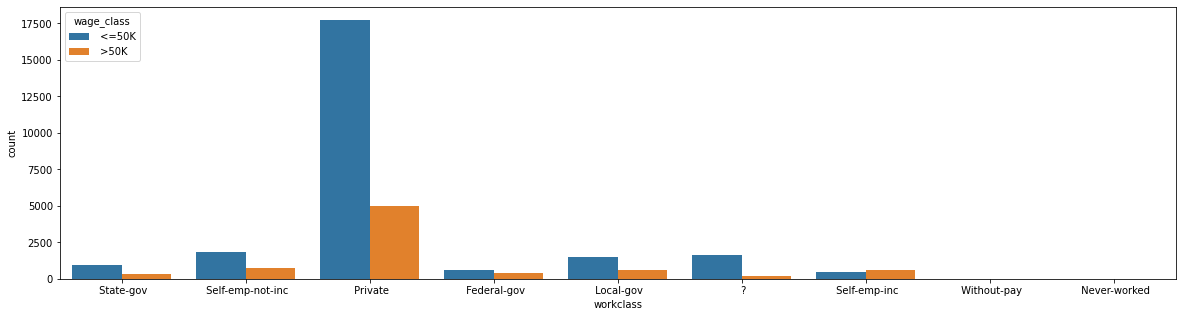

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x=train_set['workclass'],hue=train_set['wage_class'])

### fnlwgt:

In [21]:
train_set['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

<AxesSubplot:xlabel='wage_class', ylabel='fnlwgt'>

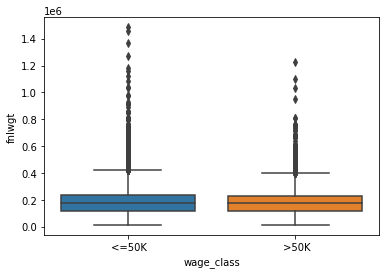

In [22]:
sns.boxplot(x=train_set['wage_class'],y=train_set['fnlwgt'])

### education:




In [23]:
train_set['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

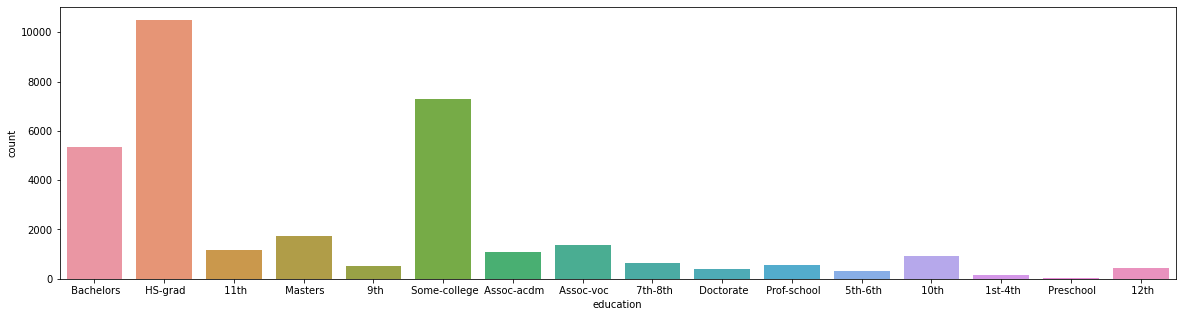

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x=train_set['education'])

In [25]:
drop_out_list=[' 10th',' 11th',' 12th',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' Preschool']
college_list=[' Assoc-acdm',' Assoc-voc',' Some-college' ]
masters_list=[' Masters',' Prof-school']

for items in drop_out_list:
    train_set['education'].replace(items, 'dropout',inplace=True)
for items in college_list:
    train_set['education'].replace(items, 'college',inplace=True)
for items in masters_list:
    train_set['education'].replace(items, 'masters',inplace=True)
train_set['education'].replace(' HS-grad', 'highschool',inplace=True)  

In [26]:
drop_out_list=[' 10th',' 11th',' 12th',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' Preschool']
college_list=[' Assoc-acdm',' Assoc-voc',' Some-college' ]
masters_list=[' Masters',' Prof-school']

for items in drop_out_list:
    test_set['education'].replace(items, 'dropout',inplace=True)
for items in college_list:
    test_set['education'].replace(items, 'college',inplace=True)
for items in masters_list:
    test_set['education'].replace(items, 'masters',inplace=True)
test_set['education'].replace(' HS-grad', 'highschool',inplace=True)  

<AxesSubplot:xlabel='education', ylabel='count'>

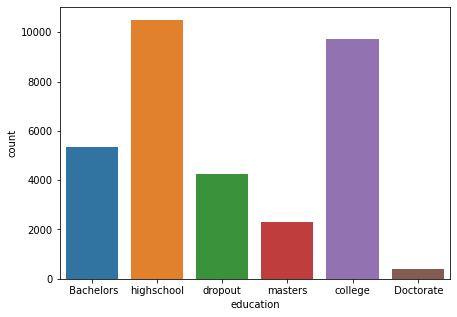

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x=train_set['education'])

In [28]:
train_set[['education','education_num']].groupby('education').mean().sort_values(by='education_num', ascending=False)

,education_num
education,
Doctorate,16.000000
masters,14.250544
Bachelors,13.000000
college,10.360986
highschool,9.000000
dropout,5.602398


### marital-status:



In [29]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [30]:
married_list=[' Married-AF-spouse',' Married-civ-spouse']
divorced_list=[' Divorced',' Separated']
not_married_list=[' Married-spouse-absent',' Never-married']
for items in married_list:
    train_set['marital_status'].replace(items, 'Married',inplace=True)
for items in divorced_list:
    train_set['marital_status'].replace(items, 'Divorced',inplace=True)
for items in not_married_list:
    train_set['marital_status'].replace(items, 'NotMarried',inplace=True)

In [31]:
for items in married_list:
    test_set['marital_status'].replace(items, 'Married',inplace=True)
for items in divorced_list:
    test_set['marital_status'].replace(items, 'Divorced',inplace=True)
for items in not_married_list:
    test_set['marital_status'].replace(items, 'NotMarried',inplace=True)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

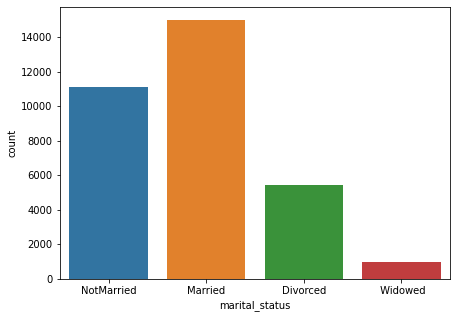

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x=train_set['marital_status'])

In [33]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [34]:
# impute '?' in occupation with frequent category
train_set['occupation'].replace(' ?',train_set['occupation'].mode()[0],inplace=True)
test_set['occupation'].replace(' ?',test_set['occupation'].mode()[0],inplace=True)

### relationship


In [35]:
train_set['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

C:\Users\hanesha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='relationship', ylabel='count'>

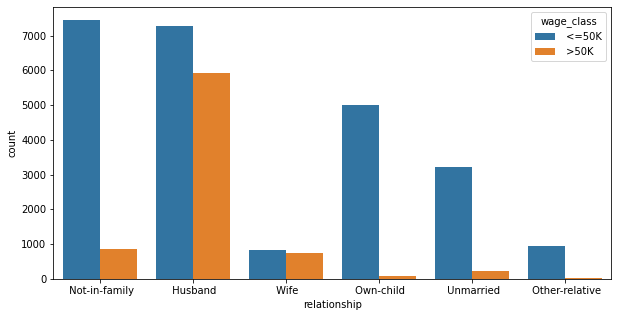

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(train_set['relationship'],hue=train_set['wage_class'])

### race:

In [37]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

C:\Users\hanesha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race', ylabel='count'>

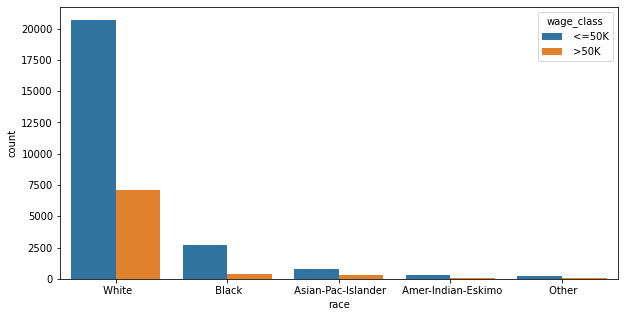

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(train_set['race'],hue=train_set['wage_class'])

### gender:

In [39]:
train_set['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

C:\Users\hanesha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

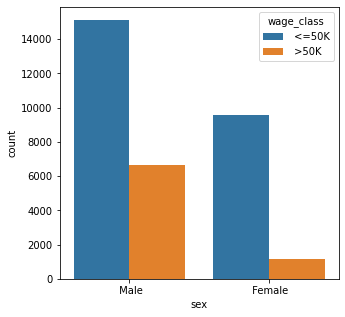

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(train_set['sex'],hue=train_set['wage_class'])

### capital-gain,capital-loss

C:\Users\hanesha\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


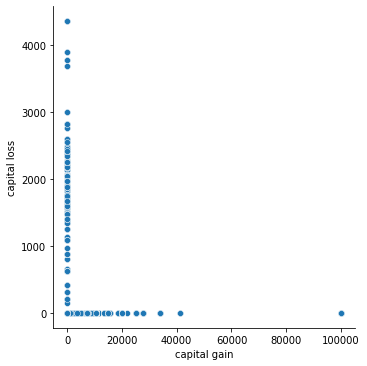

In [41]:
# Relationship between capital gain and capital loss
sns.relplot('capital_gain','capital_loss', data= train_set)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero
If capital.gain is zero there is possibility of capital loss being high or above zero.
If capital loss is zero there is possibility of capital.gain being high or above zero.

### hours-per-week:

In [42]:
train_set['hours_per_week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours_per_week, Length: 94, dtype: int64

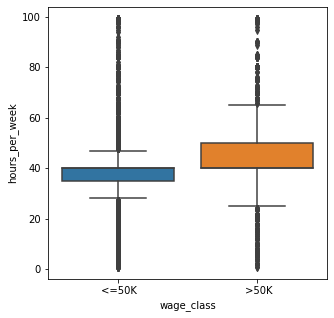

In [43]:
fig = plt.figure(figsize=(5,5)) 
sns.boxplot(x="wage_class", y="hours_per_week", data=train_set)
plt.show()

### native-country:


In [44]:
train_set['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Most of the people belongs to United States.So this feature not seems to be important

## Correlation matrix



<AxesSubplot:>

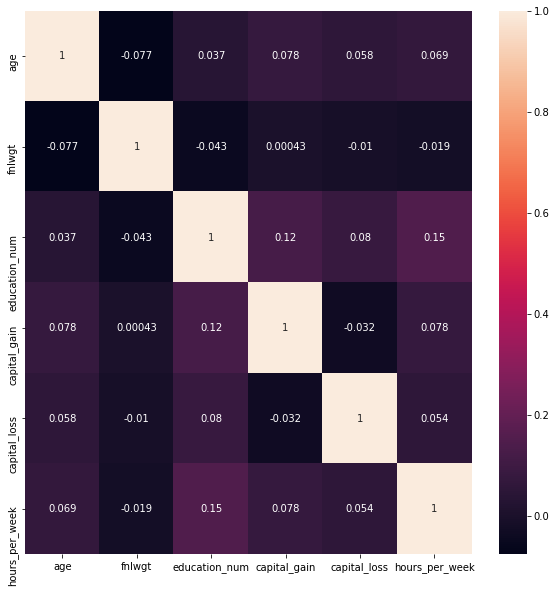

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),annot=True)

**There is no strong correlation among the numeric attributes.
There is neither strong positive nor strong negative correlation present in any variable .
The strongest correlation is present between capital gain and hours-per-week with Coefficient .082.(which is less than 0.1, it means that very small correlation among them).**

##  Dropping unnecessary columns


In [46]:
train_set.drop(labels=['fnlwgt','education_num','native_country'],axis=1,inplace=True)
train_set.head(2)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,State-gov,Bachelors,NotMarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,13,<=50K


In [47]:
test_set.drop(labels=['fnlwgt','education_num','native_country'],axis=1,inplace=True)
test_set.head(2)

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,25,Private,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K.
1,38,Private,highschool,Married,Farming-fishing,Husband,White,Male,0,0,50,<=50K.


## 5. Label encoding


In [48]:
train_set = train_set.apply(LabelEncoder().fit_transform)
train_set.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,22,7,0,3,0,1,4,1,25,0,39,0
1,33,6,0,2,3,0,4,1,0,0,12,0
2,21,4,4,1,5,1,4,1,0,0,39,0
3,36,4,3,2,5,0,2,1,0,0,39,0
4,11,4,0,2,9,5,2,0,0,0,39,0


In [49]:
test_set = test_set.apply(LabelEncoder().fit_transform)
test_set.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,8,4,3,3,6,3,2,1,0,0,39,0
1,21,4,4,2,4,0,4,1,0,0,49,0
2,11,2,2,2,10,0,4,1,0,0,39,1
3,27,4,2,2,6,0,2,1,90,0,39,1
4,1,0,2,3,9,3,4,0,0,0,29,0


## 5. Model training


In [50]:
X_train=train_set.drop('wage_class',axis=1)
y_train=train_set['wage_class']
X_test=test_set.drop('wage_class',axis=1)
y_test=test_set['wage_class']

#### 1.Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\hanesha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [55]:
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [68]:
print("Accuracy of the model with train data",logmodel.score(X_train,y_train))
print("Accuracy of the model with test data",logmodel.score(X_test,y_test))
ytrain_pred = logmodel.predict_proba(X_train)
roc_train_log=roc_auc_score(y_train, ytrain_pred[:,1])
print('logistic train roc-auc: {}'.format(roc_train_log))
ytest_pred = logmodel.predict_proba(X_test)
roc_test_log=roc_auc_score(y_test, ytest_pred[:,1])
print('logistic test roc-auc: {}'.format(roc_test_log))

Accuracy of the model with train data 0.8030773010656921
Accuracy of the model with test data 0.804004668017935
logistic train roc-auc: 0.8016028311889748
logistic test roc-auc: 0.7967921073095436


#### 2.Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier()
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
DTmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [67]:
from sklearn.metrics import roc_auc_score
print("Accuracy of the model with train data",DTmodel.score(X_train,y_train))
print("Accuracy of the model with test data",DTmodel.score(X_test,y_test))
ytrain_pred = DTmodel.predict_proba(X_train)
roc_train_DT=roc_auc_score(y_train, ytrain_pred[:,1])
print('DT train roc-auc: {}'.format(roc_train_DT))
ytest_pred = DTmodel.predict_proba(X_test)
roc_test_DT=roc_auc_score(y_test, ytest_pred[:,1])
print('DT test roc-auc: {}'.format(roc_test_DT))

Accuracy of the model with train data 0.9701483369675379
Accuracy of the model with test data 0.8111295374976967
DT train roc-auc: 0.9971954787898148
DT test roc-auc: 0.7542504852586545


#### 3. Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier()
RFmodel.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
RFmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
print("Accuracy of the model with train data",RFmodel.score(X_train,y_train))
print("Accuracy of the model with test data",RFmodel.score(X_test,y_test))
ytrain_pred = RFmodel.predict_proba(X_train)
roc_train_RF=roc_auc_score(y_train, ytrain_pred[:,1])
print('RF train roc-auc: {}'.format(roc_train_RF))
ytest_pred = RFmodel.predict_proba(X_test)
roc_test_RF=roc_auc_score(y_test, ytest_pred[:,1])
print('RF test roc-auc: {}'.format(roc_test_RF))

Accuracy of the model with train data 0.9701483369675379
Accuracy of the model with test data 0.8417787605183957
RF train roc-auc: 0.9958068332419129
RF test roc-auc: 0.8835359469867337


#### 4.XGBOOST

In [73]:
# fit model to training data
XGmodel = XGBClassifier(objective='binary:logistic')
XGmodel.fit(X_train,y_train)

C:\Users\hanesha\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [75]:
y_pred=XGmodel.predict(X_test)
print("confusion_matrix")
print("-----------------------")
print(confusion_matrix(y_test,y_pred),'\n')
print("Accuracy")
print("-----------------------")
print(accuracy_score(y_test,y_pred),'\n')
print("Classification Report")
print("-----------------------")
print(classification_report(y_test,y_pred))

confusion_matrix
-----------------------
[[11591   844]
 [ 1492  2354]] 

Accuracy
-----------------------
0.8565198697868681 

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.74      0.61      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



In [76]:
print("Accuracy of the model with train data",XGmodel.score(X_train,y_train))
print("Accuracy of the model with test data",XGmodel.score(X_test,y_test))
ytrain_pred = XGmodel.predict_proba(X_train)
roc_train_XG=roc_auc_score(y_train, ytrain_pred[:,1])
print('XG train roc-auc: {}'.format(roc_train_RF))
ytest_pred = XGmodel.predict_proba(X_test)
roc_test_XG=roc_auc_score(y_test, ytest_pred[:,1])
print('XGest roc-auc: {}'.format(roc_test_XG))

Accuracy of the model with train data 0.8940757347747305
Accuracy of the model with test data 0.8565198697868681
XG train roc-auc: 0.9958068332419129
XGest roc-auc: 0.8978540203128029


### Problem 1: Prediction task is to determine whether a person makes over 50K a year.

In [88]:
XGmodel.predict_proba(X_test)

array([[9.9905252e-01, 9.4747689e-04],
       [8.0493581e-01, 1.9506419e-01],
       [5.6219399e-01, 4.3780598e-01],
       ...,
       [2.4577934e-01, 7.5422066e-01],
       [5.1761997e-01, 4.8238003e-01],
       [3.0588001e-01, 6.9411999e-01]], dtype=float32)

### Problem 2: Which factors are important



In [96]:
XGmodel.feature_importances_

array([0.03453679, 0.02341474, 0.10666414, 0.05901872, 0.03361252,
       0.43110085, 0.017476  , 0.03867258, 0.15477635, 0.07004902,
       0.03067832], dtype=float32)

<AxesSubplot:>

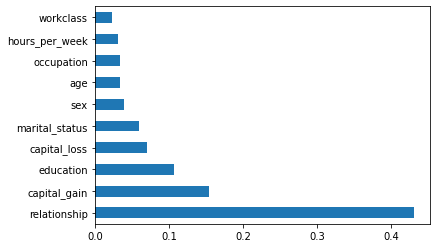

In [101]:
ranked_features=pd.Series(XGmodel.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')

### Problem 3: Which algorithms are best for this dataset

### 6. Model Comparison

In [86]:
pd.DataFrame({'Train_accuracy':[logmodel.score(X_train,y_train),DTmodel.score(X_train,y_train),RFmodel.score(X_train,y_train),XGmodel.score(X_train,y_train)],
              'Test_accuracy':[logmodel.score(X_test,y_test),DTmodel.score(X_test,y_test),RFmodel.score(X_test,y_test),XGmodel.score(X_test,y_test)]},
              index=['Logistic','Decision Tree','Random Forest','XGBoost'])

,Train_accuracy,Test_accuracy
Logistic,0.803077,0.804005
Decision Tree,0.970148,0.811130
Random Forest,0.970148,0.841779
XGBoost,0.894076,0.856520
